## Homework 9 - Question 5

In [102]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import io
from sklearn.manifold import MDS

In [103]:
f = open('cities.txt', 'r')
content = f.read()
print(content)
f.close()

# Cities: Berlin Brussels Helsinki London Madrid Moscow Paris Rejkjavik Rome Stockholm
0    651  1105 932  1870 1608 878  2385 1184 810
651  0    1648 322  1316 2253 263  2128 1171 1281
1105 1648 0    1821 2948 892  1908 2414 2202 396
932  322  1821 0    1263 2501 343  1888 1433 1433
1870 1316 2948 1263 0    3440 1053 2889 1363 2593
1608 2253 892  2501 3440 0    2486 3306 2377 1227
878  263  1908 343  1053 2486 0    2230 1105 1544
2385 2128 2414 1888 2889 3306 2230 0    3299 2131
1184 1171 2202 1433 1363 2377 1105 3299 0    1977
810  1281 396  1433 2593 1227 1544 2131 1977 0



In [104]:
D = np.loadtxt(io.StringIO(content), skiprows=1)
print(D)

[[   0.  651. 1105.  932. 1870. 1608.  878. 2385. 1184.  810.]
 [ 651.    0. 1648.  322. 1316. 2253.  263. 2128. 1171. 1281.]
 [1105. 1648.    0. 1821. 2948.  892. 1908. 2414. 2202.  396.]
 [ 932.  322. 1821.    0. 1263. 2501.  343. 1888. 1433. 1433.]
 [1870. 1316. 2948. 1263.    0. 3440. 1053. 2889. 1363. 2593.]
 [1608. 2253.  892. 2501. 3440.    0. 2486. 3306. 2377. 1227.]
 [ 878.  263. 1908.  343. 1053. 2486.    0. 2230. 1105. 1544.]
 [2385. 2128. 2414. 1888. 2889. 3306. 2230.    0. 3299. 2131.]
 [1184. 1171. 2202. 1433. 1363. 2377. 1105. 3299.    0. 1977.]
 [ 810. 1281.  396. 1433. 2593. 1227. 1544. 2131. 1977.    0.]]


In [105]:
city_labels = ["Berlin", "Brussels", "Helsinki", "London", "Madrid", "Moscow", "Paris", "Rejkjavik", "Rome", "Stockholm"]

### a)

In [106]:
def classical_mds(D, k):
    """
    Classical Multidimensional Scaling (cMDS)

    Parameters:
    D (ndarray): A symmetric matrix of distances. Shape (n, n).
    k (int): Target number of dimensions for the embedding.

    Returns:
    ndarray: The k-dimensional embedding. Shape (n, k).
    """

    # Number of points
    n = D.shape[0]
    H = np.eye(n) - np.ones((n, n)) / n
    B = -0.5 * H.dot(D).dot(H)

    # Eigendecomposition
    eigvals, eigvecs = np.linalg.eigh(B)
    
    # Sort eigenvalues and eigenvectors in decreasing order
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]

    # Select top k components
    L = np.diag(np.sqrt(np.maximum(eigvals[:k], 0)))
    V = eigvecs[:, :k]

    # Compute the embedding
    Y = V.dot(L)

    return Y


In [107]:
embedding = classical_mds(D, 2)
print(embedding)

[[ -2.83261972  -6.14919398]
 [ 10.49234834  -1.14065144]
 [-24.2103406   -1.20883179]
 [ 12.55650408   4.05516989]
 [ 25.0236029   -4.03289269]
 [-28.25161597 -10.63723339]
 [ 14.97770969  -1.76088423]
 [ -1.12289886  37.21159033]
 [ 11.45512418 -17.35033239]
 [-18.08781405   1.01325969]]


In [108]:
def plot_2d_embedding(embedding, city_names):
    """
    Plots a 2-D embedding of points, annotating each point with the corresponding city name.

    Parameters:
    embedding (ndarray): The 2-D embedding of the points. Shape (n, 2), where n is the number of points.
    city_names (list): A list of city names for annotations. Length of this list should be n.
    """

    # Check if the number of points and the number of city names match
    if embedding.shape[0] != len(city_names):
        raise ValueError("The number of points and the number of city names must match.")

    # Extract x and y coordinates
    x, y = embedding[:, 0], embedding[:, 1]

    # Create a scatter plot
    plt.scatter(x, y)

    # Annotate each point with the corresponding city name
    for i in range(len(city_names)):
        plt.annotate(city_names[i], (x[i], y[i]))

    # Optional: Set title, labels, etc.
    plt.title("2-D Embedding with City Names")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")

    # Show the plot
    plt.show()


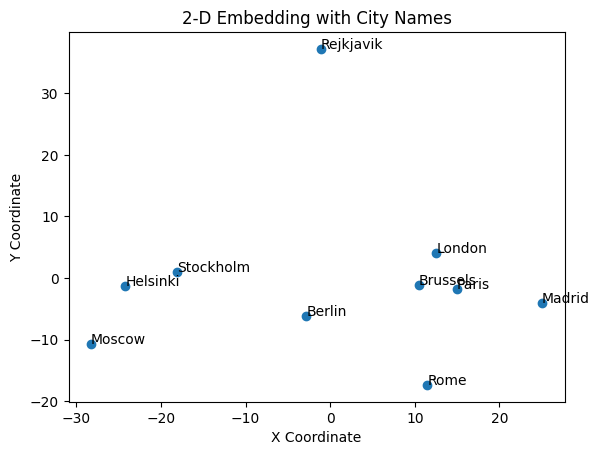

In [110]:
plot_2d_embedding(embedding, city_labels)

### b)

In [111]:
def rotate_points(data, angle):
    """
    Rotates a set of 2-D points by a given angle.

    Parameters:
    data (ndarray): 2-D data set to rotate. Shape (n, 2), where n is the number of points.
    angle (float): Rotation angle in radians.

    Returns:
    ndarray: The rotated 2-D data set.
    """
    rotation_matrix = np.array([
        [np.cos(angle), -np.sin(angle)],
        [np.sin(angle), np.cos(angle)]
    ])

    rotated_data = np.dot(data, rotation_matrix)
    return rotated_data

In [126]:
angle = np.radians(30) 
rotated_embedding = rotate_points(embedding, angle)

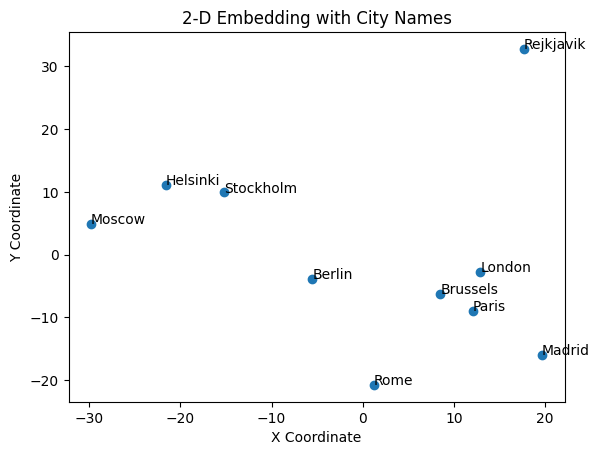

In [127]:
plot_2d_embedding(rotated_embedding, city_labels)

### c)

In [128]:
def mds_embedding(distance_matrix):
    mds = MDS(n_components=2, dissimilarity='precomputed')
    return mds.fit_transform(distance_matrix)

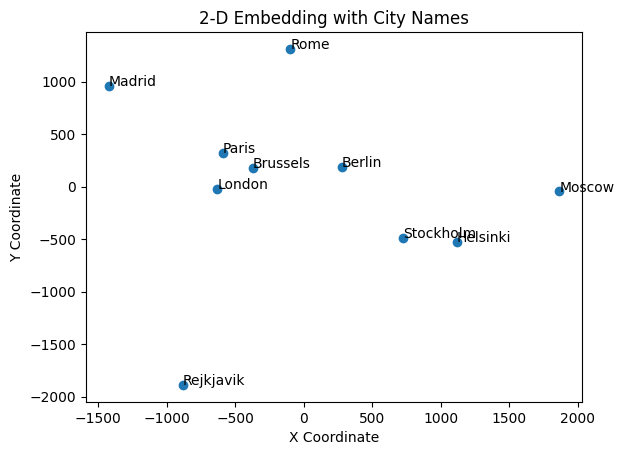

In [129]:
original_embedding = mds_embedding(D)
plot_2d_embedding(original_embedding, city_labels)

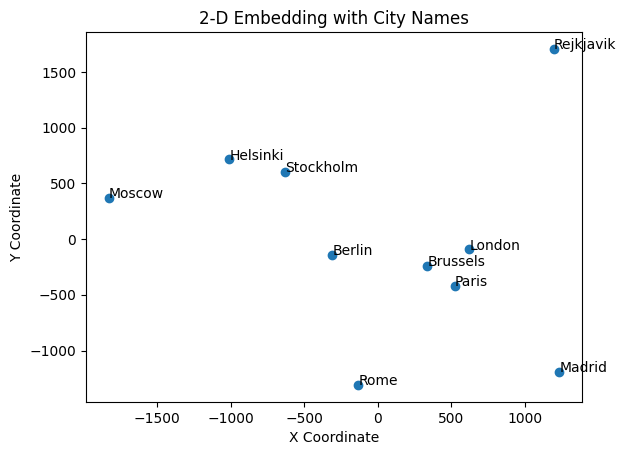

In [130]:
angle = np.radians(190)  
rotated_embedding = rotate_points(original_embedding, angle)
plot_2d_embedding(rotated_embedding, city_labels)